# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Jannik Hoffmann

Datum: 19.11.23

Gruppe: 09

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Lässt sich das Newtonsche Gesetz beweisen mit Hilfe von zwei günstigen Sensoren trotz Messfehlern?

## Versuchsaufbau und Durchführung
Um den Versuch durchzuführen wird ein Temperatursensor in den Becher mit heißem Wasser gelegt. Bei ihm wird der Verlauf der sinkenden Temperatur des heißen Wassers über die Zeit dokumentiert. Der zweite Sensor dient als Referenz der Raumtemperatur. 

<img src="figures/Versuch_newton.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
import h5py as h5
datapath = "data/newton/newton.h5"
# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
with h5.File(datapath) as z:
    h5_datei = z["RawData"]
    time_1 = z["RawData/1ee86e00-a169-664b-aa57-003f4a6a3b13/timestamp"]
    temp_1 = z["RawData/1ee86e00-a169-664b-aa57-003f4a6a3b13/temperature"]
    time_2 = z["RawData/1ee86e03-92f3-6747-9374-16582cf878a4/timestamp"]
    temp_2 = z["RawData/1ee86e03-92f3-6747-9374-16582cf878a4/temperature"]
    time_1_Array=np.array(time_1)                                                         #Zeit der Messung von Sensor 1 in ein Array schreiben
    temp_1_Array=np.array(temp_1)                                                         #Temperaturwerte von Sensor 1 in ein Array schreiben
    time_2_Array=np.array(time_2)                                                         #Zeit der Messung von Sensor 2 in ein Array schreiben
    temp_2_Array=np.array(temp_2)                                                         #Temperaturwerte von Sensor 2 in ein Array schreiben
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


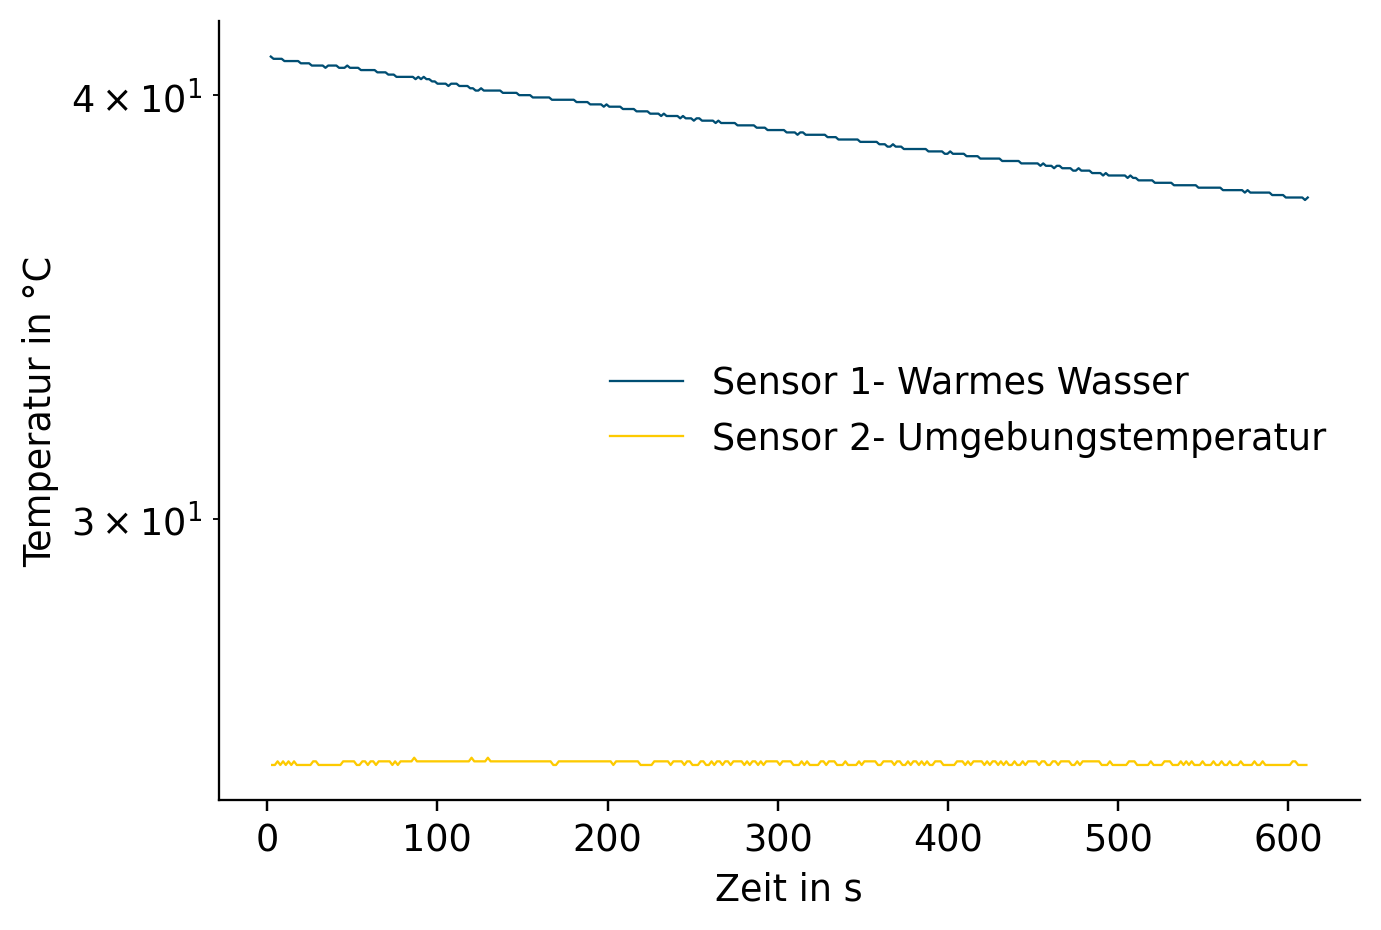

In [4]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt 
import numpy as np

plt.plot(time_1_Array, temp_1_Array, label = 'Sensor 1- Warmes Wasser')                   #Beide Arrays der Werte  von Sensor 1 plotten
plt.plot(time_2_Array, temp_2_Array, label = 'Sensor 2- Umgebungstemperatur')             #Beide Arrays der Werte  von Sensor 1 plotten

plt.xlabel('Zeit in s')                                                                   #x-Achse beschriften
plt.ylabel('Temperatur in °C')                                                            #y-Achse beschriften
plt.yscale("log")                                                                         #y-Achse logaritmisch auftragen
plt.legend()                                                                              #Legende anzeigen lassen
plt.show()
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [10]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
import numpy as np

t = np.linspace(0, 20, 10)
T_2 = temp_1_Array[25]
T_1 = temp_1_Array[0]
point = 10
T_t = np.linspace(temp_2_Array[0], temp_2_Array[25], point) 

T_t_minus_T_2 = T_1-T_2 

log_T_t_minus_T_2 = np.full_like(t, np.log(T_t_minus_T_2))

K = np.polyfit(t, log_T_t_minus_T_2, 1)

# DONE #

[-7.25577300e-18 -1.16315081e+00]


#### (iV) Ergebnis

In [ ]:
# TODO: Print result
print(K)
# DONE #

## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Ich bin mir nicht sicher ob ich das Newtonsche Abkühlungsgesetz bestätigen kann. Mein errechneter Koeffizient ist sehr klein.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich fande den Versuch auch interessant zu beobachten, wobei das Ergebnis mehr oder weniger so zu erwarten war. Die Temperatur des Wassers sinkt nach dem 1.Hauptsatz der Thermodynamik irgendwann auf die Temperatur der Umgebung ab, wenn dabei betrachtet wird das sich die Umgebung nicht messbar aufwärmen würde. Die Umgebungstemperatur ist wie zu sehen über die Zeit näherungsweise konstant.